# Clustering hiérarchique

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Visualisation interactive

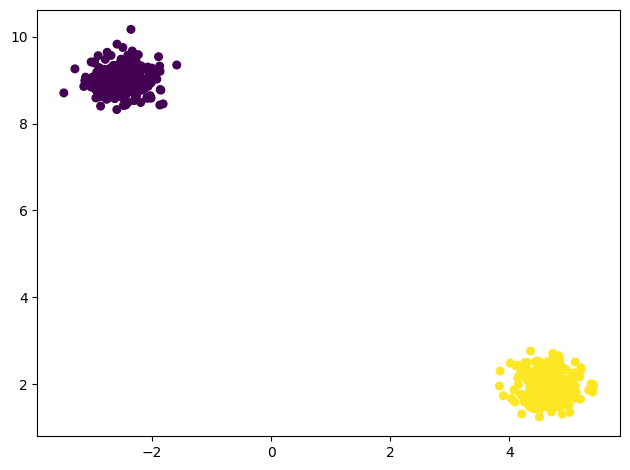

In [2]:

from sklearn.datasets import make_blobs

nb_points = 500
cluster_std = 0.3
center = 2
X, y = make_blobs(n_samples=nb_points, centers=center,cluster_std = cluster_std,random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30);
plt.tight_layout()
    


In [3]:
from sklearn.cluster import AgglomerativeClustering
def my_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Dendrogramme')
        plt.xlabel('Point ou taille des clusters')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


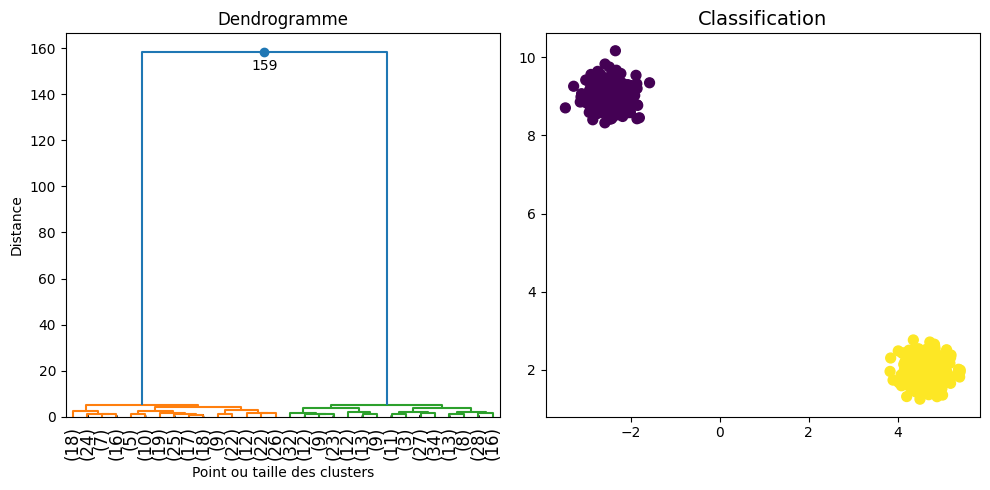

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

method = "ward"
model = AgglomerativeClustering(n_clusters = center, metric = 'euclidean', linkage = method)
Z = linkage(X, method)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
my_dendrogram(Z,truncate_mode='lastp',leaf_rotation=90.,leaf_font_size=12.,
                    show_contracted=True,annotate_above=10,)
    
plt.subplot(1,2,2)
model = AgglomerativeClustering(n_clusters = center, metric = 'euclidean', linkage = method)
y_model = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s = 50, c = y_model, label = 'Prudents')
plt.title('Classification',fontsize=14)
plt.tight_layout()
    


## Etude d'un jeu de données : achats dans un supermarché et caractérisation des acheteurs

In [13]:
df = pd.read_csv('./data/Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


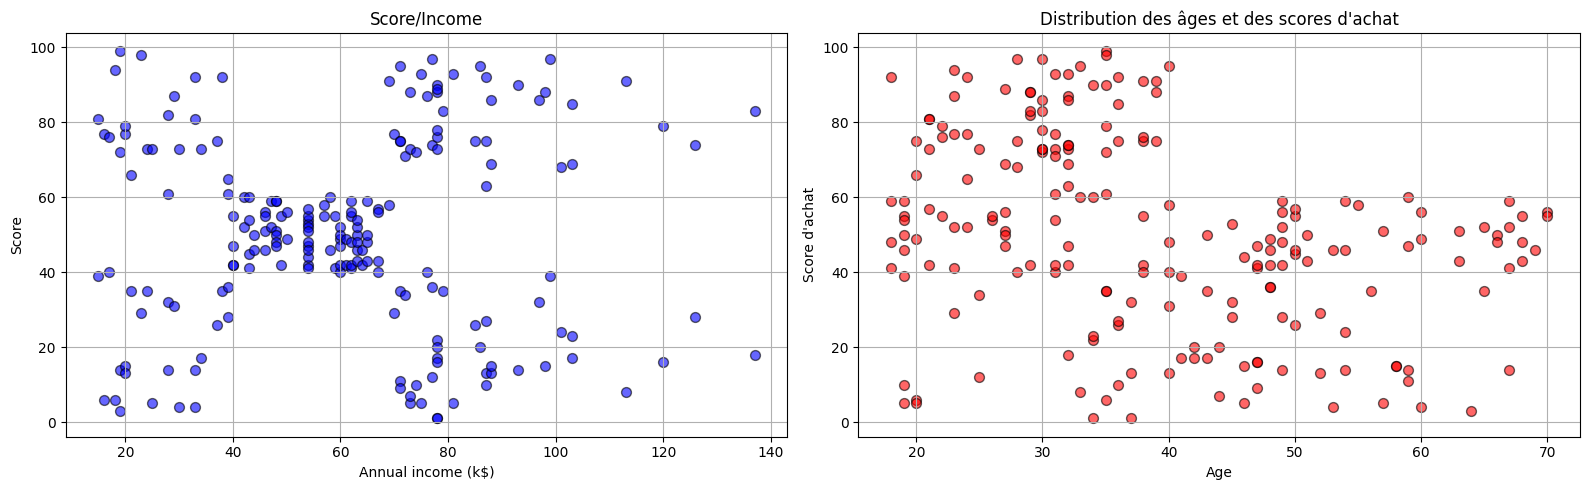

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Score/Income")
plt.xlabel ("Annual income (k$)")
plt.ylabel ("Score")
plt.grid(True)
plt.savefig('images/customers.png',dpi=100)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=50)
plt.subplot(122)
plt.title("Distribution des âges et des scores d'achat")
plt.xlabel ("Age")
plt.ylabel ("Score d'achat")
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=50)
plt.tight_layout()

L'objectif est de trouver des catégories de population ayant les mêmes comportements d'achat. Le nombre de classes étant inconnu, la classification héararchique va permettre de donner des indications sur le nombre de groupes.

In [15]:
X = df.iloc[:,[3,4]].values

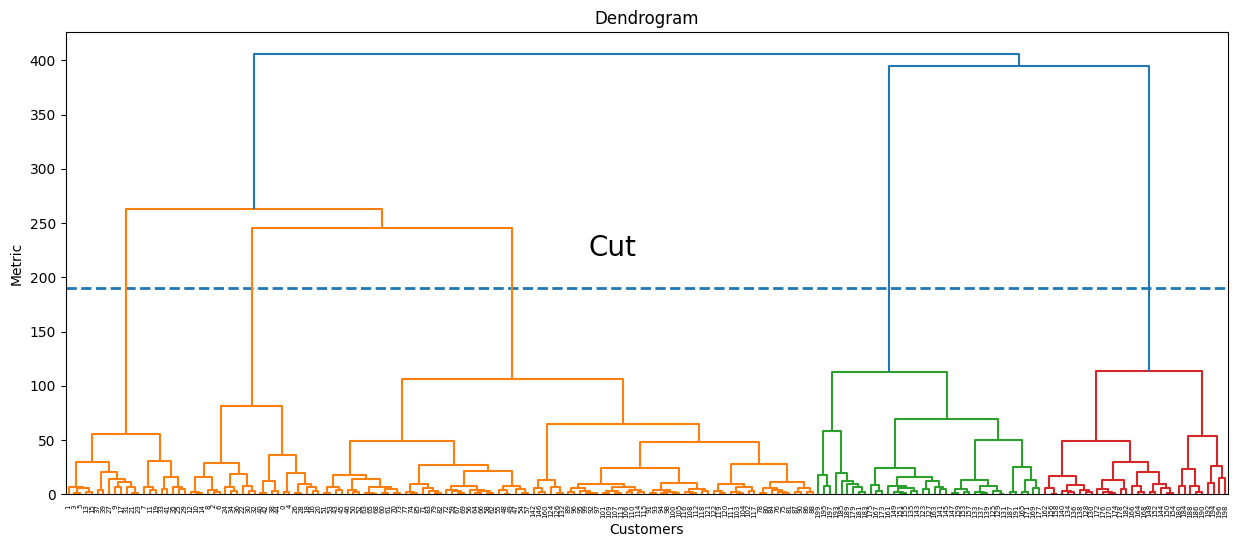

In [16]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Metric')
plt.hlines(y=190,xmin=0,xmax=2000,lw=2,linestyles='--')
plt.text(x=900,y=220,s='Cut',fontsize=20)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.savefig("images/dendrogramme2.png",dpi=100)
plt.show()


In [18]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_model = model.fit_predict(X)

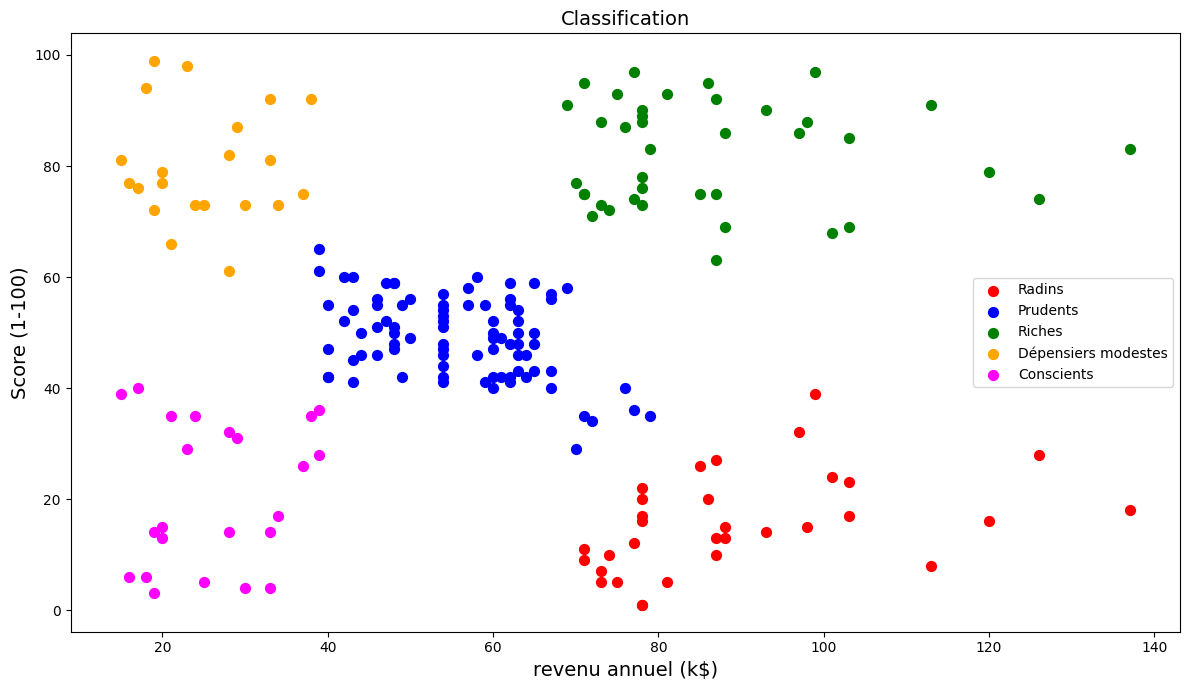

In [19]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_model == 0, 0], X[y_model == 0, 1], s = 50, c = 'red', label = 'Radins')
plt.scatter(X[y_model == 1, 0], X[y_model == 1, 1], s = 50, c = 'blue', label = 'Prudents')
plt.scatter(X[y_model == 2, 0], X[y_model == 2, 1], s = 50, c = 'green', label = 'Riches')
plt.scatter(X[y_model == 3, 0], X[y_model == 3, 1], s = 50, c = 'orange', label = 'Dépensiers modestes')
plt.scatter(X[y_model == 4, 0], X[y_model == 4, 1], s = 50, c = 'magenta', label = 'Conscients')
plt.title('Classification',fontsize=14)
plt.xlabel ("revenu annuel (k$)",fontsize=14)
plt.ylabel ("Score (1-100)",fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('images/hcluster.png',dpi=100)